## Proyecto Final

**Contexto Empresarial:**   Olist es un intermediario entre los grandes e-commerce (Amazon, Mercado libre, entre otros) y los emprendedores. Olist se encarga de publicar los productos de los emprendedores en los grandes e-commerce y facilita la distribución del produto al emprendedor poniendo a disposicion su canal de entrega.

Cada consumidor contento se traduce en una mejor review que será expuesta en los grandes e-commerce, generando mejor posicionamiento del producto del emprendedor en el mismo, mayores ventas y beneficios para Olist y todos los emprendedores asociados.  Esto a su vez atraerá nuevos emprendedores/clientes para Olist.

En este proyecto se buscará predecir si el consumidor dará una review positiva o negativa de la compra, entendiendo qué variables dependen de la satisfacción del mismo

**Problema Comercial** Se buscará formatear y analizar los datos para poder encontrar relaciones entre las distintas variables (ubicación cliente, ubicación retailer, tiempo de entrega real vs estimado, categoría de producto, entre otros) y la valoración del cliente por la experiencia de venta y producto.

**Contexto Analítico**
Se obtienen archivos en formato CSV que serán almacenados en carpeta de datos en google drive. En total son 9 archivos que contienen:
1. Datos de clientes con su localización
2. Archivo de Geolocalización
3. Ordenes de ventas con clientes y fechas asociadas
4. Productos incluidos en la orden de ventas con su vendedor y categoría de producto
5. Medio de pago de la órden de venta
6. Valoración del cliente:  Una vez que el producto es entregado o se cumple la fecha estimada de entrega el cliente
    recibe por mail una encuesta de satisfacción
7. Datos de los distribuidores
8. Datos de los productos
9. Descripción categorías en Inglés



**Hipótesis**

Utilizando los datos buscaremos responder las siguientes preguntas:
1. Cómo es la distribución de los consumidores?
2. Cómo están distribuidos los Reviews dentro del dataset?
3. Como se distribuyen las ventas por categoria?
4. Las entregas cumplen con los plazos estimados de entrega?
5. Como es la distribucion de los vendedores? Se encuentra alineada con la distribucion de los consumidores?
6. Como cambian las valoraciones segun los estados de los consumidores y de los vendedores?
7. Existe dependencia entre el tiempo de entrega y la puntuacion?
8. El % de reviews positivas es igual para todas las categorias de producto?
9. Existe una relacion entre el valor de la review y la cantidad de fotos?
10. Como es la distribucion entre las reviews positivas y negativas respecto al estado del consumidor y el tiempo de entrega?
11. Como es la distribucion entre las reviews positivas y negativas respecto al estado del vendedor y el tiempo de entrega?
12. Como es la distribucion de reviews respecto de los estados de consumidor y de vendedor?

**Importación de librerías**

In [96]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import label encoder
from sklearn import preprocessing
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import folium  # llamamos a la libreria
from folium.plugins import HeatMap # a un elemento en particular

**Lectura de Archivos y primer análisis de datos**

In [97]:
#Conectar google drive
# from google.colab import drive
# drive.mount('/content/drive')

#El dataset está compuesto por 9 archivos CSVs que se encuentran ubicados en la carpeta:

#Path
# Temp C
path = r'C:\temp\Dataset 1\\'
# Drive
#path = '/content/drive/My Drive/Data Science/Datasets 1/'

#Solamente leeré los siguientes archivos de los 9:

#1) Lectura Archivo clientes olist_customers_dataset.csv
#archivo = 'olist_customers_dataset.csv'
#ubicacion = path+archivo
#clientes = pd.read_csv(ubicacion)

#Estos son los consumidores del marketplace
url = "https://drive.google.com/uc?id=1FTpaky6LqD-L1tWAGIvGch00gcv1rDCR"
clientes = pd.read_csv(url)

print('Formato archivo clientes:', clientes.shape)
print('Columnas clientes',clientes.columns)
print(clientes.info())



Formato archivo clientes: (99441, 5)
Columnas clientes Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [98]:
#2) Lectura archivo olist_orders_dataset.csv
#orders = pd.read_csv(r'C:\temp\Dataset 1\olist_orders_dataset.csv')
#archivo = 'olist_orders_dataset.csv'
#ubicacion = path+archivo
#orders = pd.read_csv(ubicacion)

#https://drive.google.com/file/d/1Btq8Si3Bc1S8E_lZiWYXLK8r-u0oZ1_x/view?usp=drive_link
url = "https://drive.google.com/uc?id=1Btq8Si3Bc1S8E_lZiWYXLK8r-u0oZ1_x"
orders = pd.read_csv(url)

print('Formato archivo Ordenes:', orders.shape)
print('Columnas órdenes', orders.columns)
print(orders.info())


Formato archivo Ordenes: (99441, 8)
Columnas órdenes Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(

In [99]:
#3) Items en las ordenes olist_order_items_dataset.csv
#items = pd.read_csv(r'C:\temp\Dataset 1\olist_order_items_dataset.csv')
#archivo = 'olist_order_items_dataset.csv'
#ubicacion = path+archivo
#items = pd.read_csv(ubicacion)

#https://drive.google.com/file/d/1yzb2ujCX_Wcc53R-Si014OwFzQ_H4IYs/view?usp=drive_link
url = "https://drive.google.com/uc?id=1yzb2ujCX_Wcc53R-Si014OwFzQ_H4IYs"
items = pd.read_csv(url)

print('Formato archivo Items:', items.shape)
print('Columnas Items:', items.columns)
print(items.info())





Formato archivo Items: (112650, 7)
Columnas Items: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [100]:
#4) Datos de Review de ordenes olist_order_reviews_dataset.csv
#review = pd.read_csv(r'C:\temp\Dataset 1\olist_order_reviews_dataset.csv')
#archivo = 'olist_order_reviews_dataset.csv'
#ubicacion = path+archivo
#review = pd.read_csv(ubicacion)

#https://drive.google.com/file/d/1YLGTOgY50Xkr06FoPv9ne3CpznNYDTUA/view?usp=drive_link
url = "https://drive.google.com/uc?id=1YLGTOgY50Xkr06FoPv9ne3CpznNYDTUA"
review = pd.read_csv(url)

print('Formato archivo Review:', review.shape)
print('Review Columnas', review.columns)
print(review.info())



Formato archivo Review: (99224, 7)
Review Columnas Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [101]:
#6) Datos de productos olist_products_dataset.csv
#archivo = 'olist_products_dataset_2.csv'
#ubicacion = path+archivo
#productos = pd.read_csv(ubicacion, sep=';')

#https://drive.google.com/file/d/1FkAzFtya4QhAhYIKOGzKdXbzxByrldWd/view?usp=drive_link
url = "https://drive.google.com/uc?id=1FkAzFtya4QhAhYIKOGzKdXbzxByrldWd"
productos = pd.read_csv(url, sep=';')

print('Formato archivo Productos:', productos.shape)
print('Columnas producto', productos.columns)
print(productos.info())



Formato archivo Productos: (32951, 10)
Columnas producto Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'Categoria_2'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8

In [102]:
#8) Datos de Distribuidores ol_sellers_dataset.csv
#distrib = pd.read_csv(r'C:\temp\Dataset 1\olist_sellers_dataset.csv')
#archivo = 'olist_sellers_dataset.csv'
#ubicacion = path+archivo
#distrib = pd.read_csv(ubicacion)

#https://drive.google.com/file/d/14I6WAINSpbYZI5Tt9-F-aShHO_V6pY7A/view?usp=drive_link
url = "https://drive.google.com/uc?id=14I6WAINSpbYZI5Tt9-F-aShHO_V6pY7A"
distrib = pd.read_csv(url)

print('Formato archivo Distribuidores:', distrib.shape)
print('Columnas distribuidores', distrib.columns)
print(distrib.info())

Formato archivo Distribuidores: (3095, 4)
Columnas distribuidores Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [103]:
#9) Obtengo datos de geolocalización
#https://drive.google.com/file/d/1TTDnO5y1sQWE9jtN-ScsRmTdQZBWzHlt/view?usp=share_link
url = "https://drive.google.com/uc?id=1TTDnO5y1sQWE9jtN-ScsRmTdQZBWzHlt"
geoloc = pd.read_csv(url)

print('Formato archivo Geolocalizacion:', geoloc.shape)
print('Columnas Geolocalizacion', geoloc.columns)

geoloc = geoloc.drop_duplicates(subset = ['geolocation_zip_code_prefix'])
geoloc = geoloc.set_index('geolocation_zip_code_prefix')
print(geoloc.info())
geoloc.index.nunique()

Formato archivo Geolocalizacion: (1000163, 5)
Columnas Geolocalizacion Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19015 entries, 1037 to 99952
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geolocation_lat    19015 non-null  float64
 1   geolocation_lng    19015 non-null  float64
 2   geolocation_city   19015 non-null  object 
 3   geolocation_state  19015 non-null  object 
dtypes: float64(2), object(2)
memory usage: 742.8+ KB
None


19015

**Formateo de Datos para el análisis**

In [104]:
# A continuación se buscará formatear los dataframe para que permita realizar análisis sobre ellos

#Primero voy a hacer un merge de los datos de Ordenes, Posiciones,  Productos y Reviews para analizar todo en su conjunto
order_sub = items.merge(orders, left_on='order_id', right_on='order_id')
order_sub = order_sub.merge(productos, left_on='product_id', right_on='product_id')
order_sub = order_sub.merge( review, left_on='order_id', right_on='order_id')
order_sub = order_sub.merge( distrib, left_on='seller_id', right_on='seller_id')
order_sub = order_sub.merge( clientes, left_on='customer_id', right_on='customer_id')

#Solamente voy a trabajar con pedidos ya entregados, por lo que elimino el resto de los estados del dataframe
order_sub = order_sub[order_sub['order_status']=='delivered']



# Armo columnas fechas
order_sub['fcompra'] = pd.to_datetime(order_sub['order_purchase_timestamp']).dt.date
order_sub['fentrega'] = pd.to_datetime(order_sub['order_delivered_customer_date']).dt.date
order_sub['festimado'] = pd.to_datetime(order_sub['order_estimated_delivery_date']).dt.date
order_sub['fenviolim'] = pd.to_datetime(order_sub['shipping_limit_date']).dt.date
order_sub['fcreareview'] = pd.to_datetime(order_sub['review_creation_date']).dt.date


#armo 2 columnas adicionales con la diferencias entre compra y entrega, y compra y estimado para analizar retrasos
#en las entregas
order_sub['dentcomp'] = pd.to_timedelta(order_sub['fentrega'] - order_sub['fcompra'])/np.timedelta64(1,'D')
order_sub['dentest'] = pd.to_timedelta(order_sub['festimado'] - order_sub['fcompra'])/np.timedelta64(1,'D')
order_sub['drealest'] = pd.to_timedelta(order_sub['festimado'] - order_sub['fentrega'])/np.timedelta64(1,'D')
order_sub['dRevComp'] = pd.to_timedelta(order_sub['fcreareview'] - order_sub['fcompra'])/np.timedelta64(1,'D')
order_sub['dRevEnt'] = pd.to_timedelta(order_sub['fcreareview'] - order_sub['fentrega'])/np.timedelta64(1,'D')


#Elimino aquellas columnas que no voy a utilizar
#Elimino fechas en timestamp ya que las fechas las convertí a fechas como otras columnas
#Elimino IDs que no aportan información a la compra (order_item_id, review_id, customer_id,etc)
#Elimino datos de las review de texto, titulo, etc ya que la intención es predecir en base al score convertido a positivo o negativo
#Elimino tamaño y peso de producto, que está altamente correlacionado con freight que es medida logistica
#Elimino Estado de la orden ya que me quedo solamente con las ordenes entregadas para realizar el analisis
order_sub = order_sub.drop(['order_item_id', 'order_purchase_timestamp',
                           'order_delivered_customer_date', 'order_approved_at', 'order_estimated_delivery_date',
                            'shipping_limit_date', 'review_id', 'review_comment_title',
                            'review_comment_message','order_delivered_carrier_date','product_name_lenght',
                            'product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                            'customer_id', 'customer_unique_id', 'review_creation_date'
                            ,'review_answer_timestamp', 'Categoria_2', 'order_status'], axis=1)

#Se arma una columna adicional en donde se evaluará a la venta con review positiva (review_score='5' o '4')o review negativa (revie_score = '3', '2' o '1')

order_sub['review_pos']= order_sub['review_score'].apply(lambda x: True if ( x==5 or x==4) else False)

order_sub.info()
order_sub.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110013 entries, 0 to 112371
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    110013 non-null  object 
 1   product_id                  110013 non-null  object 
 2   seller_id                   110013 non-null  object 
 3   price                       110013 non-null  float64
 4   freight_value               110013 non-null  float64
 5   product_category_name       108480 non-null  object 
 6   product_description_lenght  108480 non-null  float64
 7   product_photos_qty          108480 non-null  float64
 8   review_score                110013 non-null  int64  
 9   seller_zip_code_prefix      110013 non-null  int64  
 10  seller_city                 110013 non-null  object 
 11  seller_state                110013 non-null  object 
 12  customer_zip_code_prefix    110013 non-null  int64  
 13  customer_city 

,order_id,product_id,seller_id,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,review_score,seller_zip_code_prefix,...,fentrega,festimado,fenviolim,fcreareview,dentcomp,dentest,drealest,dRevComp,dRevEnt,review_pos
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,598.0,4.0,5,27277,...,2017-09-20,2017-09-29,2017-09-19,2017-09-21,7.0,16.0,9.0,8.0,1.0,True
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff,598.0,4.0,5,27277,...,2017-07-13,2017-07-26,2017-07-05,2017-07-14,15.0,28.0,13.0,16.0,1.0,True
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff,598.0,4.0,4,27277,...,2018-06-04,2018-06-07,2018-05-23,2018-06-05,17.0,20.0,3.0,18.0,1.0,True
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff,598.0,4.0,5,27277,...,2017-08-09,2017-08-25,2017-08-07,2017-08-10,8.0,24.0,16.0,9.0,1.0,True
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,598.0,4.0,5,27277,...,2017-08-24,2017-09-01,2017-08-16,2017-08-25,14.0,22.0,8.0,15.0,1.0,True
5,a0f9acf0b6294ed8561e32cde1a966bc,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,26.93,cool_stuff,598.0,4.0,5,27277,...,2017-08-31,2017-08-24,2017-08-03,2017-08-27,35.0,28.0,-7.0,31.0,-4.0,True
6,bbf796534aaf9c59f8da8c7982db56e0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,38.50,cool_stuff,598.0,4.0,5,27277,...,2018-03-28,2018-04-12,2018-03-26,2018-03-29,10.0,25.0,15.0,11.0,1.0,True
7,c9ef97d2854afe64a3b4488bc2836af6,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,18.12,cool_stuff,598.0,4.0,5,27277,...,2017-08-14,2017-09-06,2017-08-14,2017-08-15,9.0,32.0,23.0,10.0,1.0,True
8,c9ef97d2854afe64a3b4488bc2836af6,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,58.9,17.83,cool_stuff,599.0,6.0,5,27277,...,2017-08-14,2017-09-06,2017-08-14,2017-08-15,9.0,32.0,23.0,10.0,1.0,True
9,df2d910b8b5e5f461f67043489f9569d,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,35.71,cool_stuff,598.0,4.0,1,27277,...,2017-06-26,2017-07-06,2017-06-09,2017-06-27,21.0,31.0,10.0,22.0,1.0,False


**Diccionario de Datos**
El diccionario de datos fue formateado a lo que buscaremos analizar y prededir.  Los datos de interés serán:
1.  order_id                   ->  Indicador de la venta.  Si bien no se utilizará para el modelado de datos, se utilizará para el EDA
2.  product_id                 ->  Producto vendido
3.  seller_id                  -> Distribuidor del producto
4.  product_category_name      -> Categoría a la que pertenece la venta
5.  product_description_lenght -> Longitud de la descripción del producto en el e-commerce
6.  product_photos_qty         -> Cantidad de fotos en la publicacion
7.  Price                      -> Precio total del item de la venta
8.  review_score               -> Puntaje de 1 a 5 de la review
9.  seller_state               -> Ubicación del distribuidor
10. customer_state             -> Ubicación del cliente
11. fcompra                    -> Fecha de compra
12. fentrega                   -> Fecha de Entrega
13. festimado                  -> Fecha estimada de entrega
14. fenviolim                  -> Fecha de envío límite del producto
15. fcreareview                -> Fecha de creación de la review
16. dentcomp                   -> Cantidad de días entre la entrega y la compra
17. dentest                    -> Cantidad de días estimados de entrega desde la compra
18. drealest                   -> Diferencia de días entre la entrega real y entrega estimada
19. dRevComp                   -> Diferencia de días entre la fecha de review y la de compra
20. dRevEnt                    -> Diferencia de días entre la fehca de review y la fecha de entrega real
21. review_pos                 -> Reviews positiva -> Serie determinada a partir de la serie review_score.  1,2 y 3 se consideran negativas, 4 y 5 positivas
22. Freigth_value              -> Medida logistica de envio

In [105]:
#A continuación voy a manejar algunos nulos

# Fecha entrega inicial -> Cómo se trabaja con dataset con status = entregado, la fecha de entrega no puede ser vaía.  Se detectan
# 8 registros vacios por lo que no debería ser determinante y vamos a borrar esos registros

order_sub = order_sub.dropna(subset=['fentrega'])

# También se visualiza que product_category_name contiene valores nulos. En este caso se llenará con el valor del producto
order_sub['product_category_name'] =  order_sub['product_category_name'].fillna( order_sub['product_id'])

#Las columnas product_description_lenght y product_photos_qty corresponden a publicaciones sin datos, por lo que se igualan a 0 los datos
order_sub['product_description_lenght'] = order_sub['product_description_lenght'].fillna(0)
order_sub['product_photos_qty'] = order_sub['product_photos_qty'].fillna(0)

order_sub.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 110005 entries, 0 to 112371
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    110005 non-null  object 
 1   product_id                  110005 non-null  object 
 2   seller_id                   110005 non-null  object 
 3   price                       110005 non-null  float64
 4   freight_value               110005 non-null  float64
 5   product_category_name       110005 non-null  object 
 6   product_description_lenght  110005 non-null  float64
 7   product_photos_qty          110005 non-null  float64
 8   review_score                110005 non-null  int64  
 9   seller_zip_code_prefix      110005 non-null  int64  
 10  seller_city                 110005 non-null  object 
 11  seller_state                110005 non-null  object 
 12  customer_zip_code_prefix    110005 non-null  int64  
 13  customer_city 

**EDA: Análisis Exploratorio de Datos**

Hipótesis 1: Cómo es la distribución de los consumidores?

In [106]:
#1) Se visualizará cómo es la distribución de los clientes por estados
#La hipótesis inicial es que existe una distribución uniforme de los clientes a través de los estados y se intentará demostrar
#esta hipótesis con los gráficos


#Agrego datos de geolocalizacion a consumidores

clientes = clientes.rename(columns={'customer_zip_code_prefix':'geolocation_zip_code_prefix'})

clientes_loc = clientes.join(geoloc, on='geolocation_zip_code_prefix', how='inner', lsuffix="_left", rsuffix="_right" )


# creo un mapa mundial
lat_mean =clientes_loc['geolocation_lat'].mean()
long_mean=clientes_loc['geolocation_lng'].mean()
folium_hmap = folium.Map(location=[lat_mean, long_mean],
                        zoom_start=5,  tiles="cartodb positron")

# Creamos un mapa de calor basado en el monto máximo de una propiedad de la base de datos
hm_wide = HeatMap( list(zip(clientes_loc['geolocation_lat'], clientes_loc['geolocation_lng'])),
                   min_opacity=3,
                   radius=3, blur=6,
                   max_zoom=30,
                 )

folium_hmap.add_child(hm_wide) # añadimos el objejto hm_wide al mapa original


Output hidden; open in https://colab.research.google.com to view.

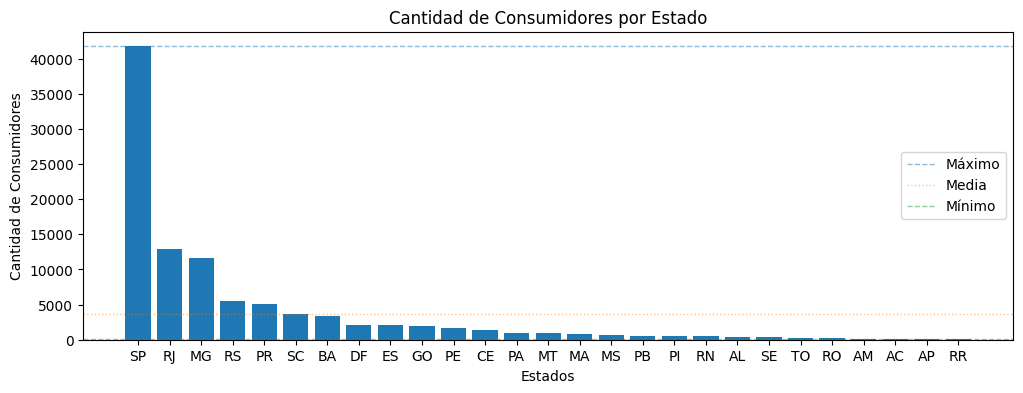

In [107]:
#Obtengo la cantidad de clientes por estado
cliente_count = clientes.groupby('customer_state').count().reset_index().sort_values(by='customer_id', ascending=False)

#Inicializo figura
fig, ax = plt.subplots(1, figsize=(12,4))

#Distribución de clientes por estado
ax.bar(cliente_count.customer_state, cliente_count.customer_id)
ax.axhline(cliente_count['customer_id'].max(), linestyle='--', alpha=0.5, linewidth=1, label='Máximo')
ax.axhline(cliente_count['customer_id'].mean(), linestyle=':', alpha=0.5, linewidth=1, label='Media', color = 'C1')
ax.axhline(cliente_count['customer_id'].min(), linestyle='--', alpha=0.5, linewidth=1, label='Mínimo', color = 'C2')
ax.set_title('Cantidad de Consumidores por Estado')
ax.set_xlabel('Estados')
ax.set_ylabel('Cantidad de Consumidores')
ax.legend()




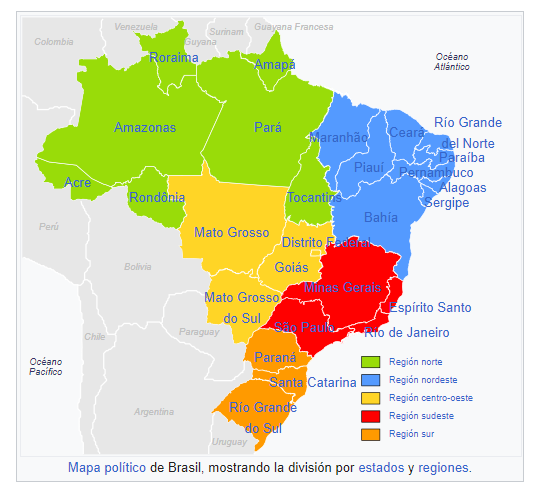

Conclusión Hipótesis 1: Se observa que la mayor densidad de consumidores se encuentra en las regiones sudeste, sur y nordeste, siendo la mayor concentración en los estados de San Pablo y Rio de JAneiro.

Hipótesis 2:  Cómo están distribuidos los Reviews dentro del dataset?  Se mantienen constantes a través del tiempo?


Media 4.08642062404257
Mediana 5.0


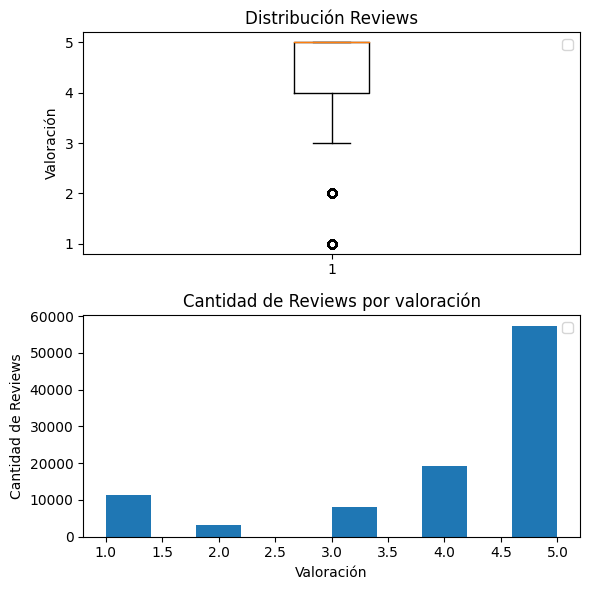

In [108]:
#Acá analizaremos el dataset the reviews para ver cómo se ubican las valoraciones.

print('Media',review.review_score.mean())
print('Mediana',review.review_score.median())

#Boxplot e histograma sobre cómo se distribuyen los Review Scores.  Cómo se visualiza la mayoría de los valores se encuentran en
# su máximo, incluso la mediana está en 5
fig, ax = plt.subplots(2, figsize=(6,6))

#Boxplot para visualizar cómo es la distribucion de datos
ax[0].boxplot(review.review_score)
ax[0].set_title('Distribución Reviews')
ax[0].set_ylabel('Valoración')
ax[0].legend()

#Histograma para visualizar la distribución de la cantidad de valoraciones
ax[1].hist(review.review_score,bins=10)
ax[1].set_title('Cantidad de Reviews por valoración')
ax[1].set_xlabel('Valoración')
ax[1].set_ylabel('Cantidad de Reviews')
ax[1].legend()

plt.tight_layout()




Se observa que la mayoría de las valoraciones se encuentran en calificaciones positivas, siendo su mediana en 5 y la media en 4,06

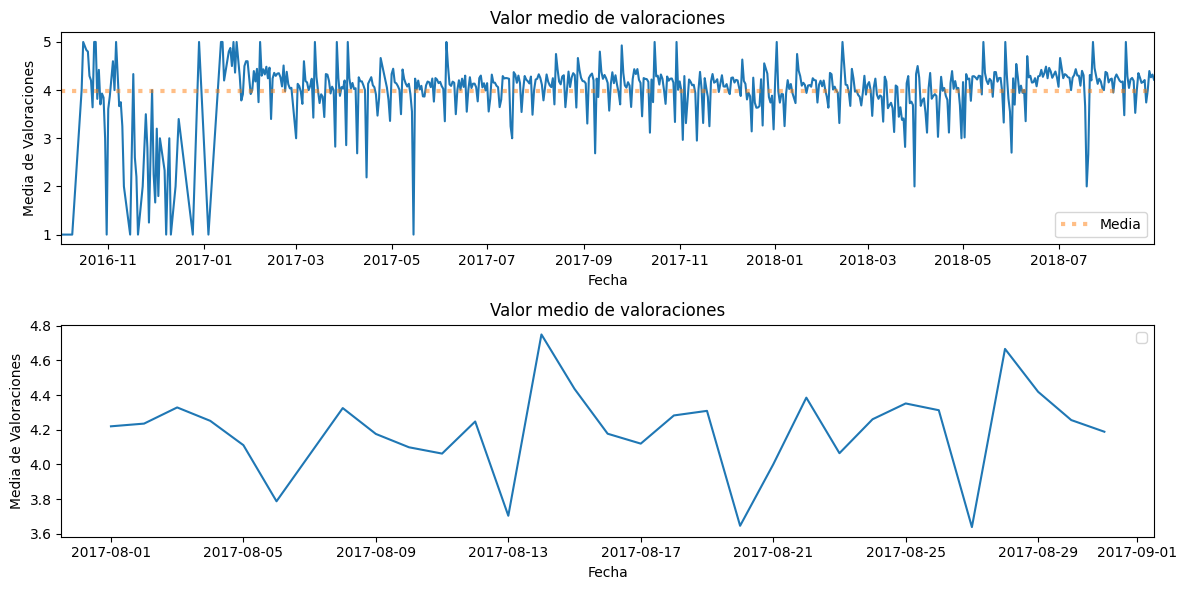

In [109]:


fig, ax = plt.subplots(2, figsize=(12,6))
# Media de la valoración a través del tiempo.  La hipótesis acá a verificar es que la misma se mantuvo prácticamente
# constante a través del tiempo
review['date'] = pd.to_datetime(review['review_creation_date']).dt.date
review_sub = review[['date','review_score']]  #Tomo las dos columnas de interes para calcular la media sobre el review por día
review_sub = review_sub.groupby('date').mean()
ax[0].plot(review_sub.index ,review_sub.review_score)
ax[0].set_title('Valor medio de valoraciones')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Media de Valoraciones')
ax[0].axhline(review_sub.review_score.mean(), linestyle=':', alpha=0.5, linewidth=3, label='Media', color = 'C1')
ax[0].legend()
ax[0].set_xlim(review_sub.index[0], review_sub.index.max())

# Se toma un mes para mirar en mas detalle como es el ciclo
review['month'] = pd.to_datetime(review['review_creation_date']).dt.month
review['year'] = pd.to_datetime(review['review_creation_date']).dt.year

review_2017 = review.loc[review['year']==2017]
review_201708 = review_2017.loc[review['month']==8]

review_201708
review_201708 = review_201708[['date','review_score']]  #Tomo las dos columnas de interes para calcular la media sobre el review por día
review_201708 = review_201708.groupby('date').mean()
ax[1].plot(review_201708.index ,review_201708.review_score)
ax[1].set_title('Valor medio de valoraciones')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Media de Valoraciones')
ax[1].legend()

plt.tight_layout()
# Con el gráfico se verifica la hipótesis que la media de valoración se mantiene constante a través del tiempo, excepto
# al inicio de las mediciones en donde se observa que es menor a la media

**Conclusión Hipótesis 2:**  Si bien al principio hay una media inferior, solamente se observa hasta enero 2017, a partir de esa fecha parecería que la media se mantiene constante a lo largo del tiempo, por lo que se podría inferir que los primeros meses presentan algún evento atípico que se podría descartar y considerar que la media se mantiene constante en el tiempo.  Se observa que la mayoría de las reviews tienden a ser positivas entre 4 y 5.  
Cómo se visualizaba cierta periodicidad en el gráfico, se realizó un zoom para el mes de agosto de 2017 y se observa que la media de valoración los domingos tiende a ser siempre la más baja.

**Hipotesis 3**  Como se distribuyen las ventas por categoria?

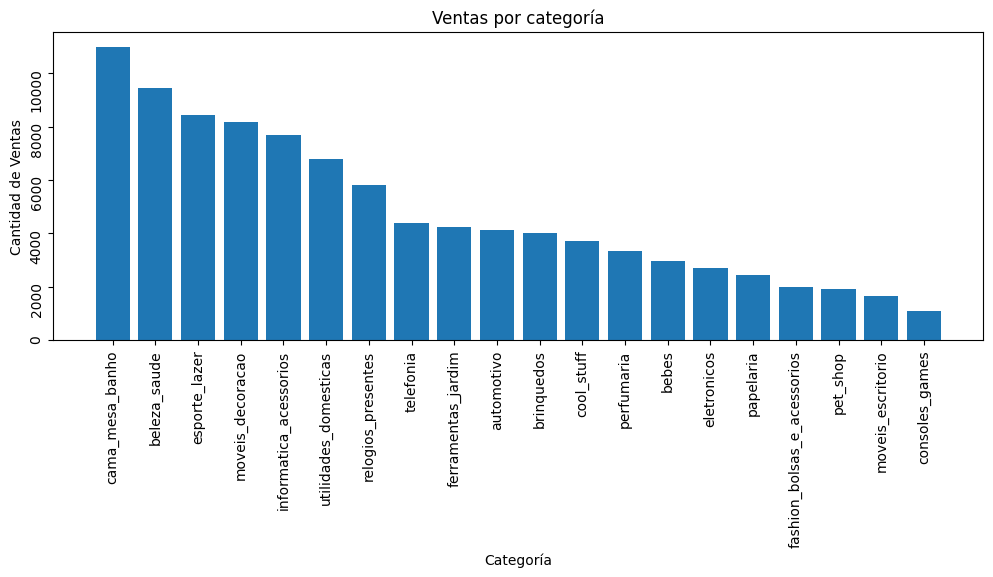

In [110]:
#Analizaremos los datasets de ordenes de ventas

fig, ax = plt.subplots( figsize=(12, 4))


#1) Veremos la distribución por ventas por categoría d, e productos en donde se visualizala que la cantidad de ventas
# no es igual para todas las categorías siendo supermercado la categoría que más se vende. Como existen 73 categorias distintas
# visualizaremos solamente el top 15
order_sub_cat = order_sub['review_score'].groupby(order_sub['product_category_name']).count().sort_values(ascending=False)
#plt.xticks(rotation=45)
ax.bar( order_sub_cat[0:20].index, order_sub_cat[0:20].values)
ax.set_title('Ventas por categoría')
ax.set_xlabel('Categoría')
ax.set_ylabel('Cantidad de Ventas')
ax.tick_params(labelrotation=90)

#plt.xticks(rotation=45)



**Conclusion Hipotesis 3:**  Las ventas no estan distribuidas de igual manera en todas las categorias. La categoria cama mesa bano es la que concentra mayor cantidad de ventas

**Hipotesis 4**  Las entregas cumplen con los plazos estimados de entrega?

Text(0, 0.5, 'Cantidad de Ventas')

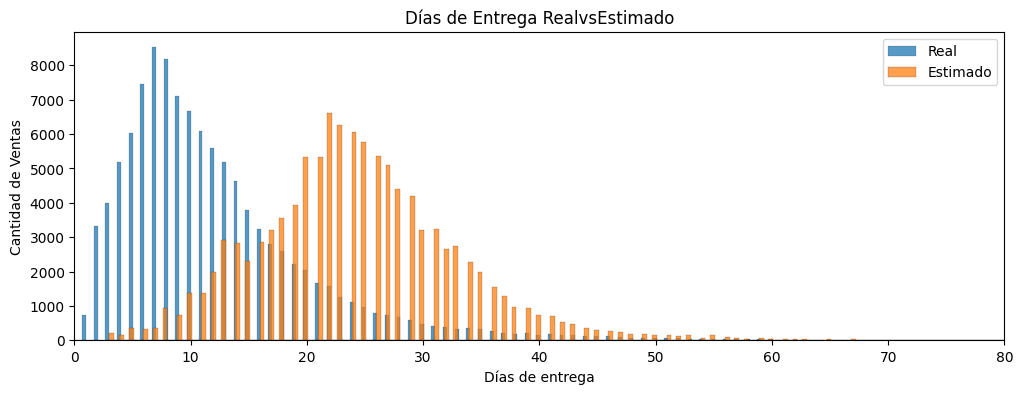

In [111]:
# Se grafica en un histograma la diferencia de entrega real con la compra y el estimado de fecha de entrega contra la fecha de compra
# En el gráfico se puede observar que la distribuciones de días se encuentran en rango menores los reales que los estimados,
# entendiendo que en general se observa una entrega real en una menor cantidad de días que el estimado original

fig, ax = plt.subplots( figsize=(12, 4))
ax = sns.histplot(data=order_sub, x='dentcomp', label='Real')
ax = sns.histplot(data=order_sub, x='dentest', label='Estimado')
ax.set_xlim(0,80)
ax.legend()
ax.set_title('Días de Entrega RealvsEstimado')
ax.set_xlabel('Días de entrega')
ax.set_ylabel('Cantidad de Ventas')


# Se grafica cómo fueron los tiempos de entrega a través del tiempo
#ax[2] = sns.scatterplot(data=order_sub, x='fcompra', y='dentcomp')

**Conclusion Hipotesis 4:**  Se observa que los tiempos de entrega reales son menores que los tiempos estimados de entrega

**Hipótesis 5:**  Como es la distribucion de los vendedores?  Se encuentra alineada con la distribucion de los clientes?

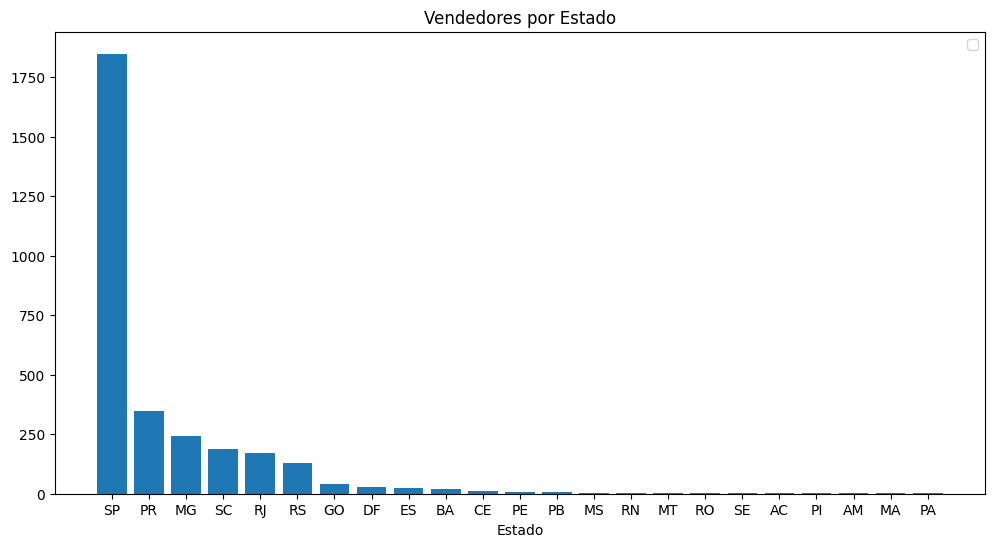

In [112]:
#Análisis de Vendedores
# Visualizar cantidad de vendedores por estados
distrib_stat = distrib['seller_id'].groupby(distrib['seller_state']).count().sort_values(ascending=False)

fig2, ax = plt.subplots(figsize=(12,6))
ax.bar(distrib_stat.index, distrib_stat.values)
ax.set_title('Vendedores por Estado')
ax.set_xlabel('Estado')
ax.legend()
# En el gráfico se puede observar que la mayoría de los vendedores se encuentran en SP

In [113]:
#1) Se visualizará cómo es la distribución de los clientes por estados
#La hipótesis inicial es que existe una distribución uniforme de los clientes a través de los estados y se intentará demostrar
#esta hipótesis con los gráficos


#Agrego datos de geolocalizacion a clientes

distrib = distrib.rename(columns={'seller_zip_code_prefix':'geolocation_zip_code_prefix'})

#clientes_loc = clientes.join(geoloc, on='geolocation_zip_code_prefix', how='outer', lsuffix='_left', rsuffix='_right')
#clientes_loc = clientes


distrib_loc = distrib.join(geoloc, on='geolocation_zip_code_prefix', how='inner', lsuffix="_left", rsuffix="_right" )


# creo un mapa mundial
lat_mean =distrib_loc['geolocation_lat'].mean()
long_mean=distrib_loc['geolocation_lng'].mean()
folium_hmap = folium.Map(location=[lat_mean, long_mean],
                        zoom_start=5,  tiles="cartodb positron")

# Creamos un mapa de calor basado en el monto máximo de una propiedad de la base de datos
hm_wide = HeatMap( list(zip(distrib_loc['geolocation_lat'], distrib_loc['geolocation_lng'])),
                   min_opacity=3,
                   radius=3, blur=6,
                   max_zoom=30,
                 )

folium_hmap.add_child(hm_wide) # añadimos el objejto hm_wide al mapa original


**Conclusión Hipótesis 5:**  Se observa que la distribucion de los vendedores estan mayormente distribuidos en la region de San Pablo y alrededores.  Si comparamos la distribucion de los vendedores respecto de los clientes vemos que los vendedores no estan distribuidos de igual manera, pero se nota una mayor concentracion en el estado con mayor cantidad de clientes

**Hipotesis 6** Como cambian las valoraciones segun los estados de los clientes y de los vendedores?

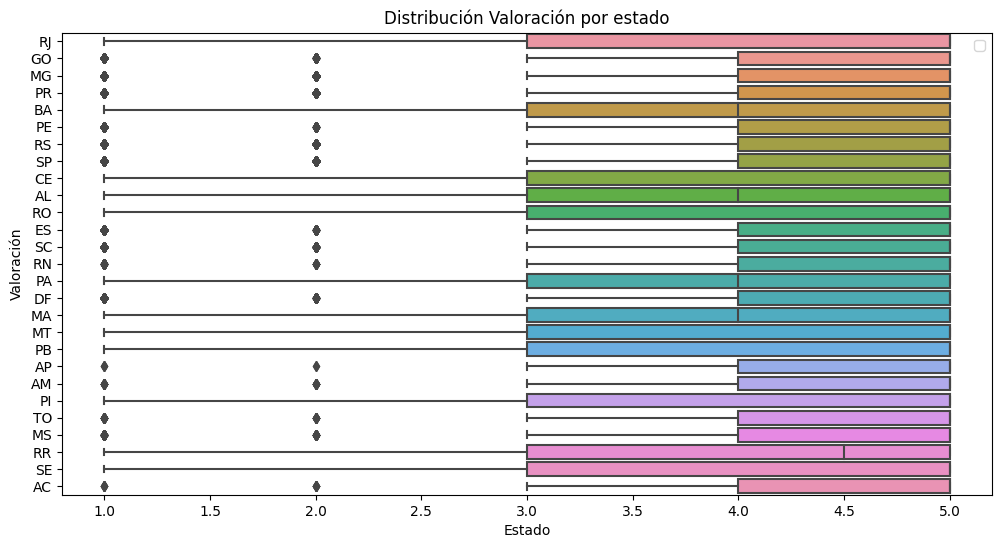

In [130]:
# Se realizarán análisis bivariados para poder determinar correlación entre la valoración y distintos factores
# 1) Ubicacion de cliente
# 2) Distribuidor
# 3) Cantidad de días de entrega
# 4) Por categoría


# Se realiza un boxplot para conocer cómo es la valoración de los clientes por estado.
fig2, ax2 = plt.subplots( figsize=(12,6))
sns.boxplot( data=order_sub, y='customer_state', x='review_score',ax=ax2)
ax2.set_title('Distribución Valoración por estado')
ax2.set_xlabel('Estado')
ax2.set_ylabel('Valoración')
ax2.legend()
#Se puede visualizar que la distribución para algunos estados es mayor y se encuentra entre 3 y 5 respecto a otros que
#está entre 4 y 5




In [115]:
#Cantidad de ventas por estado
order_sub.groupby('customer_state').count().sort_values(by='order_id')

,order_id,product_id,seller_id,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,review_score,seller_zip_code_prefix,...,fentrega,festimado,fenviolim,fcreareview,dentcomp,dentest,drealest,dRevComp,dRevEnt,review_pos
customer_state,,,,,,,,,,,,,,,,,,,,,
RR,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
AP,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
AC,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91
AM,163,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
RO,272,272,272,272,272,272,272,272,272,272,...,272,272,272,272,272,272,272,272,272,272
TO,309,309,309,309,309,309,309,309,309,309,...,309,309,309,309,309,309,309,309,309,309
SE,373,373,373,373,373,373,373,373,373,373,...,373,373,373,373,373,373,373,373,373,373
AL,428,428,428,428,428,428,428,428,428,428,...,428,428,428,428,428,428,428,428,428,428
PI,519,519,519,519,519,519,519,519,519,519,...,519,519,519,519,519,519,519,519,519,519


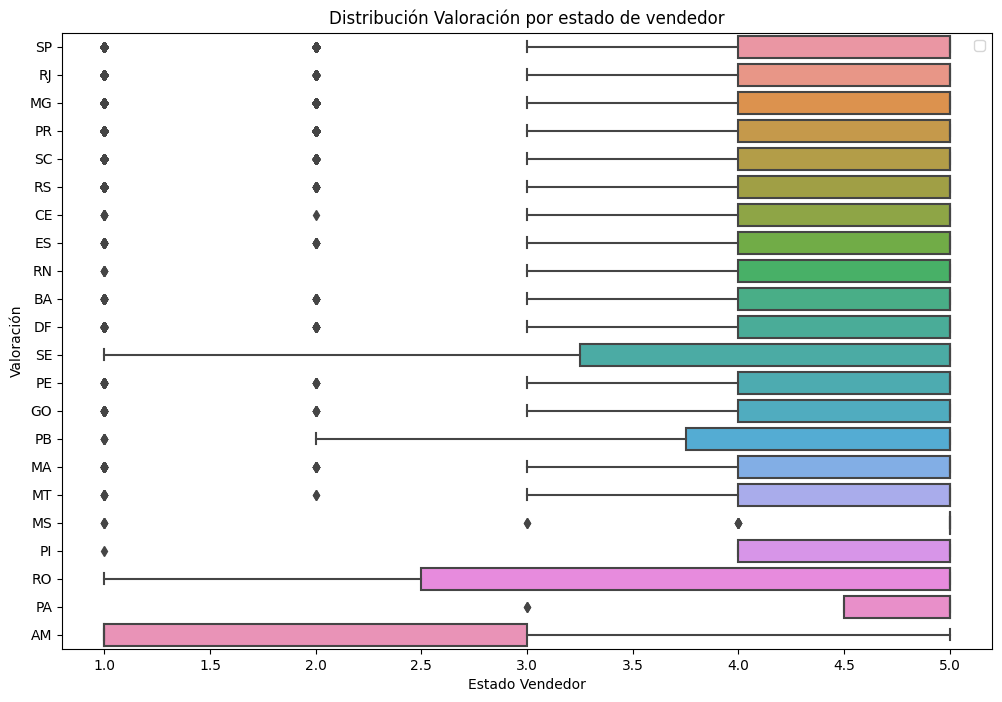

In [116]:
# 1) Por Distribuidor
# Se realiza un gráfico de boxplot para saber cómo es la distribución por vendedores
fig2, ax = plt.subplots(figsize=(12,8))
sns.boxplot( data=order_sub, y='seller_state', x='review_score', ax=ax)
ax.set_title('Distribución Valoración por estado de vendedor')
ax.set_xlabel('Estado Vendedor')
ax.set_ylabel('Valoración')
ax.legend()
#En el gráfico se observa que los vendedores en el estado AM y AC tienen la peor valoración de todos y PA y MS los mejores




In [117]:
#Cantidad de ventas por estado del vendedor
order_sub.groupby('seller_state').count().sort_values(by='order_id')

,order_id,product_id,seller_id,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,review_score,seller_zip_code_prefix,...,fentrega,festimado,fenviolim,fcreareview,dentcomp,dentest,drealest,dRevComp,dRevEnt,review_pos
seller_state,,,,,,,,,,,,,,,,,,,,,
AM,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
PA,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
SE,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
PI,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
RO,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
PB,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
MS,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
RN,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
CE,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


**Conclusion Hipotesis 6**  Las valoraciones no se mantienen constantes en los distintos estados ni por cliente ni por vendedor.  Si bien en general las valoraciones tienen a ser positivas.   En cuanto a los vendedores, se puede observar el estado AM con una valoracion muy negativa respecto al resto, pero cuando se compara con la cantidad de mediciones se observa que tiene solamente 3 por lo que podria no ser significativo este resultado y estar sesgado. Tambien AM es un estado que se encuentra lejos de donde estan distribuidos los clientes y vendedores por lo que el tiempo de entrega podria llegar a estar afectando Se necesitaria realizar analisis adicionales.

**Hipótesis 7**: Existe dependencia entre el tiempo de entrega y la puntuacion?

Text(0.5, 0, 'Fecha Entrega')

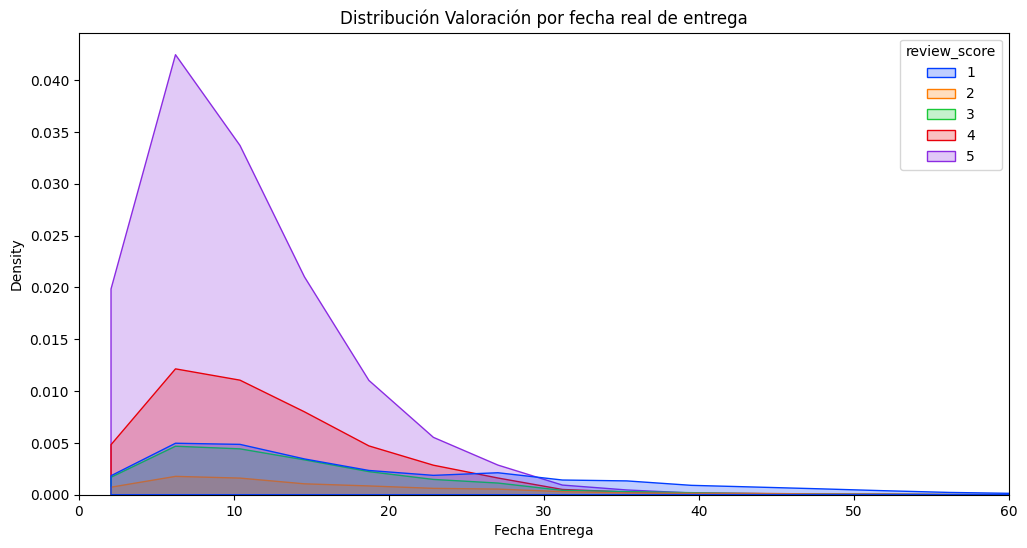

In [126]:
# 3) Cantidad de días de entrega

#Se realiza un histograma para visualizar la distribución de cantidad de días de entrega por review. Se observa que a
#partir del día 20 el score =1 empieza a mantenerse constante y después del día 30 empieza a superar al resto de los reviews
fig2, ax = plt.subplots(figsize=(12,6))

sns.histplot( data=order_sub, x='dentcomp', hue='review_score', bins=50, element='poly', stat='density', ax=ax, palette="bright")

ax.set_xlim(0,60)
ax.set_title('Distribución Valoración por fecha real de entrega')
ax.set_xlabel('Fecha Entrega')



**Conclusión Hipótesis 7:**  Se observa que antes de los 30 dias la mayor cantidad de reviews son positivas, pero luego del día 30 la mayoría de las review son negativas, por lo que se visualiza una dependencia del review en cuanto a la fecha de entrega siempre que esta sobrepase un limite  

In [119]:
#4) Por categoría
#Se buscará comparar cómo son las valoraciones por categoría de producto.

pd.crosstab(order_sub.product_category_name, order_sub.review_pos, normalize='index')

review_pos,False,True
product_category_name,,
0082684bb4a60a862baaf7a60a5845ed,0.000000,1.000000
00ab8a8b9fe219511dc3f178c6d79698,0.750000,0.250000
00d62b338366db4c4aec8547ea8f928e,0.000000,1.000000
0103863bf3441460142ec23c74388e4c,1.000000,0.000000
014fcf6bd5cd4c7ee29fb3bb618c445e,1.000000,0.000000
...,...,...
sinalizacao_e_seguranca,0.260204,0.739796
tablets_impressao_imagem,0.209877,0.790123
telefonia,0.257260,0.742740


**Hipotesis 8**  El % de reviews positivas es igual para todas las categorias de producto?

**Conclusion Hipotesis 8** En la tabla anterior se puede observar que el % de reviews positivas y negativas por cada categoría no es la misma para todas las categorías, indicando que podría existir una correlación entre la categoría y el tipo de review

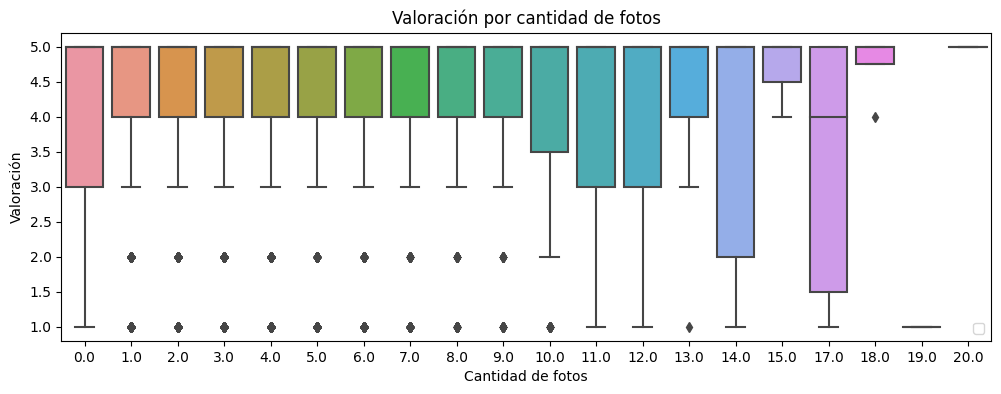

In [120]:
# Por información de producto

#Se realizará un gráfico en donde se visualice valoración media y mediana por cantidad de fotos del producto
fig2, ax = plt.subplots(figsize=(12,4))
#plt.clf()
ax = sns.boxplot(data=order_sub, x='product_photos_qty', y='review_score' )

ax.set_title('Valoración por cantidad de fotos')
ax.set_xlabel('Cantidad de fotos')
ax.set_ylabel('Valoración')
ax.legend()

#En estos gráficos se visualiza que dependiendo de la cantidad de fotos, el puntaje de los reviews cambia.  Se podría inferir que
# que entre 1 y 9 fotos las reviews van a tener mejor valoración, aunque para 13, 15, 18 y 20 también.  Para analizar más en detalle
# este gráfico a continuación voy a analizar cantidad de ventas con publicaciones cierta cantidad de fotos




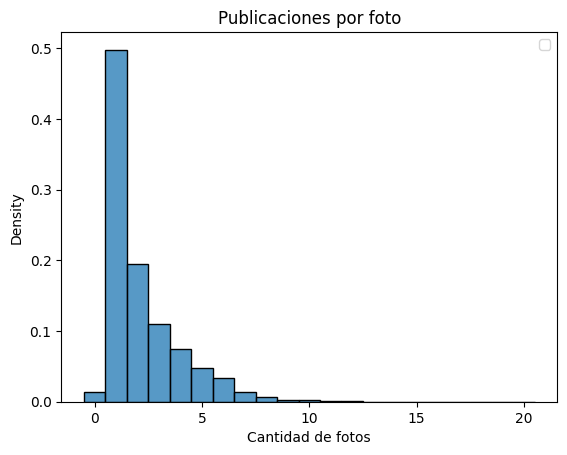

In [121]:

# Acá se intenta comprender cómo es la cantidad de ventas con publicaciones con cierta cantidad de fotos
ax = sns.histplot(data=order_sub, x='product_photos_qty', stat='density', discrete=True)

ax.set_title('Publicaciones por foto')
ax.set_xlabel('Cantidad de fotos')
ax.legend()




**Hipotesis 9**  Existe una relacion entre el valor de la review y la cantidad de fotos?

**Conclusion Hipotesis 9**  Se puede visualizar que segun el primer grafico, se podria inferir que si la publicacion tiene mas de 10 fotos, la review tiende a ser peor.  Por eso es necesario analizar la distribucion de publicaciones con foto y se visualiza que hay muy pocas publicaciones con mas de 9 fotos.  Por este motivo, no es confiable el analisis de que si la publicacion tiene mas de 10 fotos, la review tiende a ser mas negativa

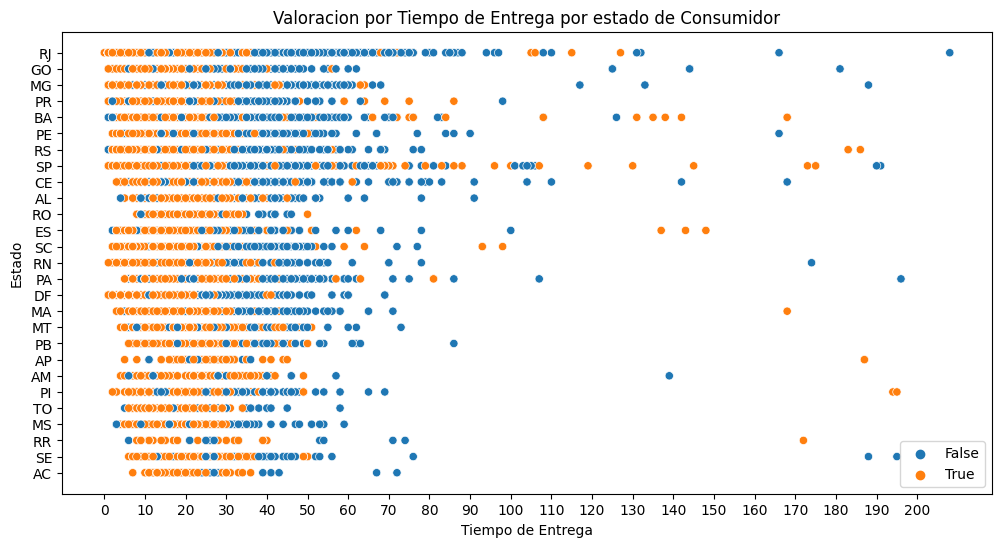

In [127]:
fig2, ax2 = plt.subplots( figsize=(12,6))
sns.scatterplot( data=order_sub, y='customer_state', x='dentcomp', hue='review_pos',ax=ax2)
ax2.set_title('Valoracion por Tiempo de Entrega por estado de Consumidor')
ax2.set_xlabel('Tiempo de Entrega')
ax2.set_ylabel('Estado')
ax2.set_xticks(np.arange(order_sub.dentcomp.min(), order_sub.dentcomp.max(), step=10))
ax2.legend()

**Hipotesis 10** Como es la distribucion entre las reviews positivas y negativas respecto al estado del cliente y el tiempo de entrega?

**Conclusion Hipotesis 10** Como se analizo anteriormente, a partir del dia 30 de entrega se ve un marcado cambio de calificaciones positivas a negativas.  Esto se visualiza con el cambio de color de naranja a azul.  Adicionalmente se visualiza con para todos los estados se visualiza un escenario similar


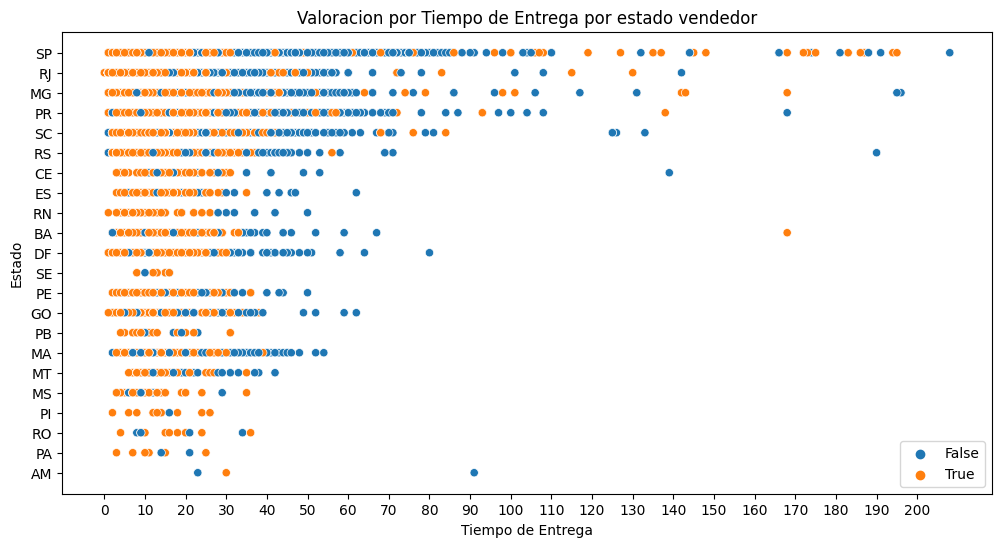

In [123]:
fig2, ax2 = plt.subplots( figsize=(12,6))
sns.scatterplot( data=order_sub, y='seller_state', x='dentcomp', hue='review_pos',ax=ax2)
ax2.set_title('Valoracion por Tiempo de Entrega por estado vendedor')
ax2.set_xlabel('Tiempo de Entrega')
ax2.set_ylabel('Estado')
ax2.set_xticks(np.arange(order_sub.dentcomp.min(), order_sub.dentcomp.max(), step=10))
ax2.legend()

**Hipotesis 11** Como es la distribucion entre las reviews positivas y negativas respecto al estado del vendedor y el tiempo de entrega?

**Conclusion Hipotesis 11** Como se analizo anteriormente, a partir del dia 30 de entrega se ve un marcado cambio de calificaciones positivas a negativas.  Esto se visualiza con el cambio de color de naranja a azul.  Tambien se visualiza que hay pocos estados de vendedor cuyo tiempo de entrega supera los 55/60 dias

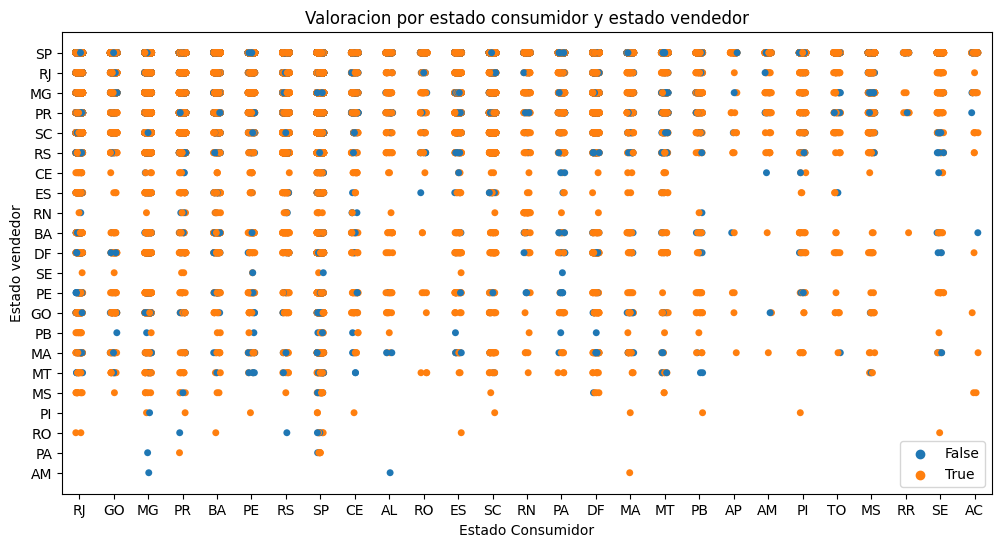

In [128]:
fig2, ax2 = plt.subplots( figsize=(12,6))
sns.stripplot( data=order_sub, y='seller_state', x='customer_state', hue='review_pos',ax=ax2)
ax2.set_title('Valoracion por estado consumidor y estado vendedor')
ax2.set_xlabel('Estado Consumidor')
ax2.set_ylabel('Estado vendedor')
ax2.legend()

**Hipotesis 12**  Como es la distribucion de reviews respecto de los estados de cliente y de vendedor?

**Conclusion Hipotesis 12** Se visualiza que la distribucion de review positiva y negativa no es la misma dependiendo del estado de cliente y el estado del vendedor.  Por ejemplo entre AM (Amazonas) y AL (Alagoas) se visualiza solamente un punto negativo, pero entre SP (San Pablo) y BA (Bahia) se visualizan varios puntos positivos.  Asi se puede analizar aquellas combinaciones entre estado vendedor/estado de cliente en donde podria inferirse que la puntuacion va a ser mejor o peor

In [125]:
order_sub.columns

Index(['order_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'product_category_name', 'product_description_lenght',
       'product_photos_qty', 'review_score', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'fcompra', 'fentrega', 'festimado',
       'fenviolim', 'fcreareview', 'dentcomp', 'dentest', 'drealest',
       'dRevComp', 'dRevEnt', 'review_pos'],
      dtype='object')